### Importing required libaries and packages

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import (accuracy_score, confusion_matrix,
                             roc_curve, roc_auc_score,
                            precision_recall_curve, average_precision_score,
                            precision_score, recall_score, f1_score, roc_auc_score,
                            precision_recall_fscore_support)

In [2]:
df = pd.read_csv("spam_ham_dataset.csv")
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


- label_num : 0 is ham; 1 is spam

In [3]:
# dropping unnecessary column
df = df.drop(columns=['Unnamed: 0'], axis=1)
df

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [4]:
# Data cleaning
df['text'] = df['text'].str.replace('\W', ' ') # Removes punctuation
df['text'] = df['text'].str.lower()
df.head()

<ipython-input-4-15ee9e80c6c1>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\W', ' ') # Removes punctuation


,label,text,label_num
0,ham,subject enron methanol meter 988291 th...,0
1,ham,subject hpl nom for january 9 2001 see a...,0
2,ham,subject neon retreat ho ho ho we re arou...,0
3,spam,subject photoshop windows office cheap ...,1
4,ham,subject re indian springs this deal is to ...,0


<ipython-input-5-0d4f19436ce3>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


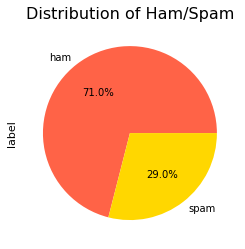

In [5]:
# Distribution of Target variable
df.groupby('label').size().plot(kind='pie', autopct='%1.1f%%', textprops={'fontsize': 10},
                                  colors=['tomato', 'gold'])
ax = plt.axes()
ax.set_ylabel('label', size=11)
ax.set_title("Distribution of Ham/Spam", fontsize=16)
plt.show()

- There is a class imbalance in target variable

### Buliding Naive Bayes Model


In [6]:
X = df['text']
y = df['label']

In [7]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.pipeline import Pipeline

# Converting text data into numerical
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),  # Convert text to word counts
    ('classifier', MultinomialNB(alpha=1.0))  # Multinomial Naive Bayes with Laplace smoothing (alpha=1)
])

# vectorizer = CountVectorizer()
# X_train_vec = vectorizer.fit_transform(X_train)
# X_test_vec = vectorizer.transform(X_test)

In [9]:
# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', MultinomialNB())])

In [10]:
# Predicting on testing data
y_pred = pipeline.predict(X_test)

### Evaluating Model and Visualizations

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9719806763285024


- The model gives 97% accuracy!

Text(33.0, 0.5, 'Actual')

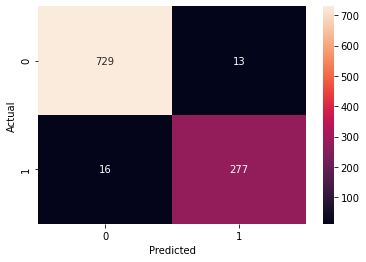

In [12]:
#create a confusion matrix 
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

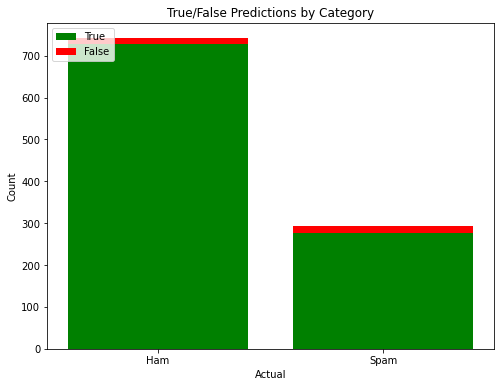

In [13]:
cm = confusion_matrix(y_test, y_pred)
# bar plot
# Define the categories and data for the stacked bar chart
categories = ['Ham', 'Spam']
true_negative = cm[0, 0]
false_positive = cm[0, 1]
false_negative = cm[1, 0]
true_positive = cm[1, 1]

# Create a stacked bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, [true_negative, true_positive], label='True', color='green')
plt.bar(categories, [false_positive, false_negative], label='False', color='red', bottom=[true_negative, true_positive])
plt.xlabel('Actual')
plt.ylabel('Count')
plt.title('True/False Predictions by Category')
plt.legend(loc='upper left')
plt.show()

In [14]:
y_probs = pipeline.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 'spam'

# Mapping 'ham' to 0 and 'spam' to 1 in true labels
y_true_binary = y_test.map({'ham': 0, 'spam': 1})

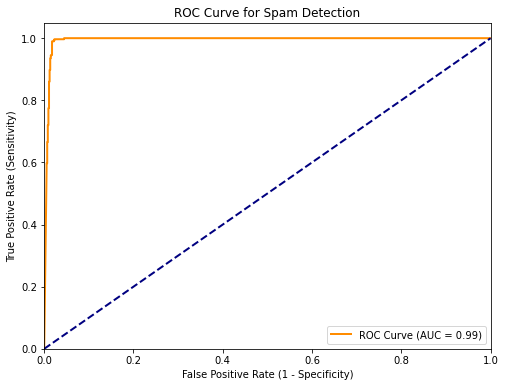

In [15]:
# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_true_binary, y_probs)

# Calculating the AUC (Area Under the Curve) score
roc_auc = roc_auc_score(y_true_binary, y_probs)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Spam Detection')
plt.legend(loc='lower right')
plt.show()

- We calculate the AUC (Area Under the Curve) score using roc_auc_score to measure the overall performance of the classifier.
- The curve shows how the true positive rate (sensitivity) changes as the false positive rate (1-specificity) varies at different classification thresholds.
- The dotted line represents the ROC curve for a random classifier (no skill).

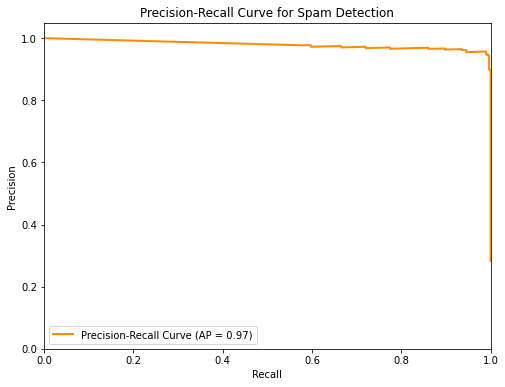

In [16]:
# Calculating precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true_binary, y_probs)
# Calculate the average precision score to assess model's precision at various decision thresholds
average_precision = average_precision_score(y_true_binary, y_probs)

# Plotting the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Spam Detection')
plt.legend(loc='lower left')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

- The curve illustrates the trade-off between precision and recall at different decision thresholds.
- Precision: High precision means that the model is accurate in flagging emails as spam and has fewer false positives. Laplace smoothing can help improve precision by reducing the impact of rare or previously unseen words in emails.
- Recall: High recall means that the model is good at capturing most of the spam, minimizing false negatives. Laplace smoothing can also affect recall by making the model less prone to overfitting on rare words.

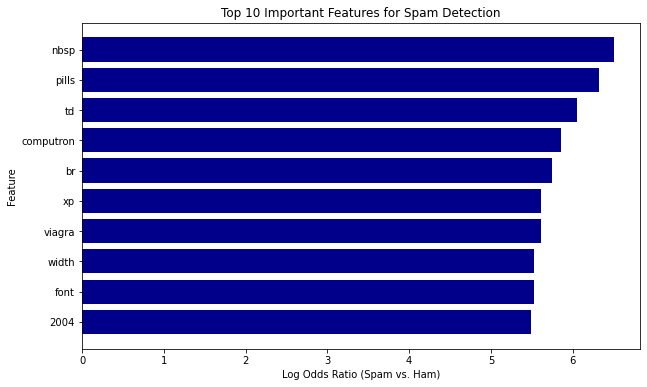

In [17]:
# Extract the model's feature log probabilities (log likelihoods)
log_probabilities = pipeline.named_steps['classifier'].feature_log_prob_

# Get the feature names from the CountVectorizer
feature_names = pipeline.named_steps['vectorizer'].get_feature_names_out()

# Calculate the log odds ratio for each feature
log_odds_ratio = log_probabilities[1] - log_probabilities[0]  # Spam - Ham

# Sort features by log odds ratio in descending order
sorted_indices = np.argsort(log_odds_ratio)[::-1]

# Choose the top N features
N = 10  
top_feature_indices = sorted_indices[:N]
top_features = [feature_names[i] for i in top_feature_indices]
top_log_odds_ratio = [log_odds_ratio[i] for i in top_feature_indices]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_log_odds_ratio, color='darkblue')
plt.xlabel('Log Odds Ratio (Spam vs. Ham)')
plt.ylabel('Feature')
plt.title(f'Top {N} Important Features for Spam Detection')
plt.gca().invert_yaxis()  #displays imp features on top
plt.show()

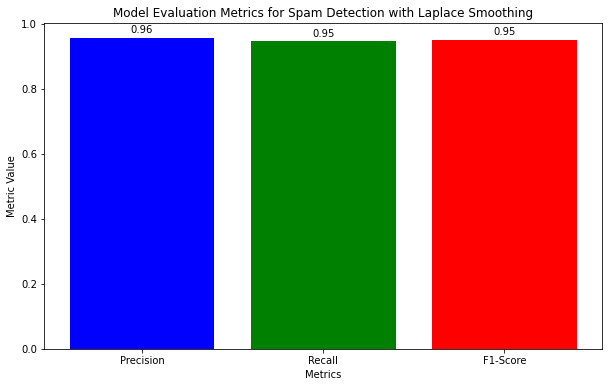

In [23]:
# Calculating precision, recall, and F1-score for the 'spam' class (positive label)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, labels=['spam'], average=None)

# Creating a bar chart to visualize these metrics
import matplotlib.pyplot as plt

metrics = ['Precision', 'Recall', 'F1-Score']
values = [precision[0], recall[0], f1[0]]

x = range(len(metrics))

plt.figure(figsize=(10, 6))
bars = plt.bar(x, values, color=['blue', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Metric Value')
plt.title('Model Evaluation Metrics for Spam Detection with Laplace Smoothing')
plt.xticks(x, metrics)

# Adding values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

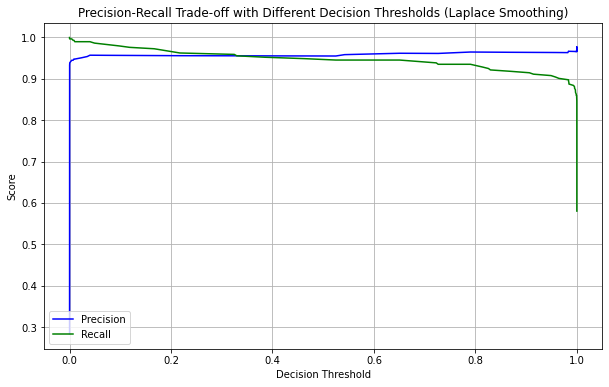

In [25]:
# Calculate precision and recall at different decision thresholds
precision, recall, thresholds = precision_recall_curve(y_true_binary, y_probs)

# visualizing the trade-offs
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.xlabel('Decision Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Trade-off with Different Decision Thresholds (Laplace Smoothing)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()